In [1]:
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/GAT_model.py ./
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/datasets_list.py ./
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/trainer.py ./
! cp -r /content/drive/MyDrive/Colab_Notebooks/GAT/datasets ./

In [2]:
import datasets.cora as cora
import torch
from torch import optim

from GAT_model import GAT
from trainer import Trainer
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,3), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,3), 'GB')

cora_data = cora.load_cora('datasets/cora/', device=device)

Using device: cuda
Tesla V100-SXM2-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [4]:
(cora_data[1] == 1).sum()

tensor(13264, device='cuda:0')

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,3), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,3), 'GB')

Using device: cuda
Tesla V100-SXM2-16GB
Memory Usage:
Allocated: 0.069 GB
Cached:    0.186 GB


In [15]:
model = GAT(
    num_of_layers=2,
    num_heads_per_layer=[8, 8],
    num_features_per_layer=[cora.NUM_INPUT_FEATURES, 100, cora.NUM_CLASSES],
    add_skip_connection=False,
    bias=True,
    dropout=0.6,
)

optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
trainer = Trainer(model=model, optimizer=optimizer, data=cora_data, return_logs=True)

logs_na = trainer.train(500)

----------------------
train 0.10714285714285714
val 0.172
----------------------
train 0.16428571428571428
val 0.182
----------------------
train 0.17857142857142858
val 0.196
----------------------
train 0.17142857142857143
val 0.21
----------------------
train 0.24285714285714285
val 0.232
----------------------
train 0.2642857142857143
val 0.258
----------------------
train 0.24285714285714285
val 0.268
----------------------
train 0.19285714285714287
val 0.294
----------------------
train 0.24285714285714285
val 0.316
----------------------
train 0.32142857142857145
val 0.334
----------------------
train 0.24285714285714285
val 0.362
----------------------
train 0.32857142857142857
val 0.382
----------------------
train 0.32857142857142857
val 0.398
----------------------
train 0.40714285714285714
val 0.41
----------------------
train 0.35714285714285715
val 0.422
----------------------
train 0.32142857142857145
val 0.44
----------------------
train 0.39285714285714285
val 0.456
-

In [18]:
model = GAT(
    num_of_layers=3,
    num_heads_per_layer=[8, 8, 8],
    num_features_per_layer=[cora.NUM_INPUT_FEATURES, 100, 100, cora.NUM_CLASSES],
    add_skip_connection=True,
    bias=True,
    dropout=0.7,
)

optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=5e-3)
trainer = Trainer(model=model, optimizer=optimizer, data=cora.load_cora('datasets/cora/', device=device), return_logs=True)

logs_a = trainer.train(200)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


----------------------
train 0.15
val 0.204
----------------------
train 0.15
val 0.268
----------------------
train 0.20714285714285716
val 0.322
----------------------
train 0.35
val 0.368
----------------------
train 0.3357142857142857
val 0.416
----------------------
train 0.39285714285714285
val 0.46
----------------------
train 0.4714285714285714
val 0.51
----------------------
train 0.5285714285714286
val 0.558
----------------------
train 0.5
val 0.586
----------------------
train 0.55
val 0.612
----------------------
train 0.6214285714285714
val 0.628
----------------------
train 0.6928571428571428
val 0.632
----------------------
train 0.7428571428571429
val 0.644
----------------------
train 0.6785714285714286
val 0.644
----------------------
train 0.7357142857142858
val 0.652
----------------------
train 0.7285714285714285
val 0.662
----------------------
train 0.7214285714285714
val 0.672
----------------------
train 0.8285714285714286
val 0.678
----------------------
trai

In [26]:
! cp -r /content/drive/MyDrive/Colab_Notebooks/ClusterGCN/ ./
! cp -r /content/drive/MyDrive/Colab_Notebooks/ClusterGCN/input ./
! pip install torch-geometric -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install Texttable

! rm -rf ./input
! mkdir ./input
! cp -r /content/drive/MyDrive/Colab_Notebooks/input/input_cora/* ./input

! python ./ClusterGCN/src/main.py --clustering-method random --learning-rate 0.0001 --test-ratio 0.6 --layers 100 100

! rm -rf ./cluster_gcn_cora/
! mkdir ./cluster_gcn_cora/
! mv train_loss.csv val_loss.csv ./cluster_gcn_cora/

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
usage: main.py [-h] [--edge-path [EDGE_PATH]]
               [--features-path [FEATURES_PATH]] [--target-path [TARGET_PATH]]
               [--clustering-method [CLUSTERING_METHOD]] [--epochs EPOCHS]
               [--seed SEED] [--dropout DROPOUT]
               [--learning-rate LEARNING_RATE] [--test-ratio TEST_RATIO]
               [--cluster-number CLUSTER_NUMBER]
main.py: error: unrecognized arguments: --layers 100 100
mv: cannot stat 'train_loss.csv': No such file or directory
mv: cannot stat 'val_loss.csv': No such file or directory


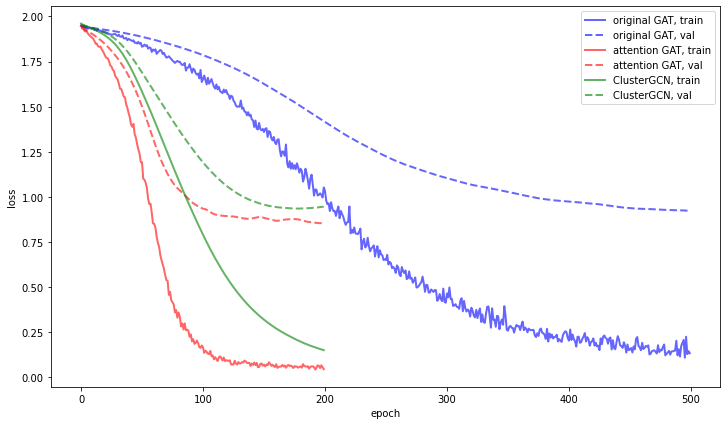

In [24]:
import pandas as pd

plt.figure(figsize=(12, 7))
plt.plot(logs_na['train_loss'], 'b', alpha=0.6, linewidth=2, label='original GAT, train')
plt.plot(logs_na['val_loss'], '--b', alpha=0.6, linewidth=2, label='original GAT, val')
plt.plot(logs_a['train_loss'], 'r', alpha=0.6, linewidth=2, label='attention GAT, train')
plt.plot(logs_a['val_loss'], '--r', alpha=0.6, linewidth=2, label='attention GAT, val')
plt.plot(pd.read_csv('./cluster_gcn_cora/train_loss.csv', header=None).values, 'g', alpha=0.6, linewidth=2, label='ClusterGCN, train')
plt.plot(pd.read_csv('./cluster_gcn_cora/val_loss.csv', header=None).values, '--g', alpha=0.6,  linewidth=2, label='ClusterGCN, val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('cora.pdf')
plt.show()

In [10]:
# plt.figure(figsize=(12, 7))
# plt.plot(logs_na['train_acc'], 'b', alpha=0.6, label='original GAT, train')
# plt.plot(logs_na['val_acc'], '--b', alpha=0.6, label='original GAT, val')
# plt.plot(logs_a['train_acc'], 'r', alpha=0.6, label='attention GAT, train')
# plt.plot(logs_a['val_acc'], '--r', alpha=0.6, label='attention GAT, val')
# plt.legend()
# plt.show()